In [ ]:
import keras
keras.__version__

'2.7.0'

In [ ]:
## read MNIST dataset (hello-world dataset in deep learning)
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
## The data format is tensor
train_images.shape

(60000, 28, 28)

In [ ]:
## The first number is the sample size of the training data
len(train_labels)

60000

In [ ]:
## This is a multiclass-classifcation problem. The class labels are 0,1,2...,9 for 10 digits
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
## Take a look at the first digit in the training data
## In Python, the index starts from 0
digit = train_images[0]
## The digit is represented by a 28x28 matrix.
digit.shape

(28, 28)

In [ ]:
## Each element in the matrix is the grey value for the pixel.
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

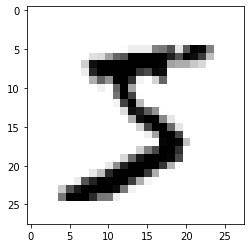

In [ ]:
## Displaying the first digit
## import a plot library
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [ ]:
## Flatten and normalize the data
## For the illustration purpose, we will treat each image as a vector of inputs
## In the future, we will use convolutional neural networks (CNNs) to utilize the specifal structure of an image.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
## each image is a 28x28=784 dimensional vector 
train_images[0].shape

(784,)

In [ ]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
## convert the labels to nominal data (2 is not bigger than 1, it just means 2 and 1 are two different labels)
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# # build up a single layer network 
from keras import models
from keras import layers

## define the network architecture (for a single layer network)
## Here we use 'network' to be the name of this single layer network. You can use whatever name you want.
network = models.Sequential() 

## In keras, we use 'add' function to add the layer to the network
## Here we specify the network to have 512 nodes in this layer. The 'input_shape' tells keras what the dimension of the input data
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 

## We add the output layer, which will connect to the resposne.
## Since this is a multi-class classification problem, the output should be 10 probabilities: pi_0=P(digit is 0), ..., pi_9=P(digit is 9).
network.add(layers.Dense(10, activation='softmax'))


Specifically, $\pi_k = \frac{\exp\Big\{\beta_{k0}+\sum_{j=1}^{512}\beta_{kj}X_j\Big\}}{\sum_{l=0}^9\exp\Big\{\beta_{l0}+\sum_{j=1}^{512}\beta_{lj}X_j\Big\}}$

In [ ]:
## summary of the network architecture
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Specify the loss function, optimization method and evaluation criterion
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
## fit the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 19ms/step - loss: 0.2566 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1020 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0680 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0491 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0366 - accuracy: 0.9887


In [ ]:
## get prediction on test data
network.predict(test_images)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9788
test_acc: 0.9787999987602234


In [ ]:
## Build up multiple-layer network with regularization
from keras import regularizers
network.mlp = models.Sequential() 
network.mlp.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,))) 
network.mlp.add(layers.Dropout(0.4)) 
network.mlp.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001))) 
network.mlp.add(layers.Dropout(0.4)) 
network.mlp.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001))) 
network.mlp.add(layers.Dropout(0.5)) 
network.mlp.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001))) 
network.mlp.add(layers.Dropout(0.4))
network.mlp.add(layers.Dense(10, activation='softmax')) 
network.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.mlp.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
network.mlp.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 34s 71ms/step - loss: 0.5131 - accuracy: 0.8806
Epoch 2/10
469/469 [==============================] - 32s 69ms/step - loss: 0.2581 - accuracy: 0.9532
Epoch 3/10
469/469 [==============================] - 35s 75ms/step - loss: 0.2164 - accuracy: 0.9611
Epoch 4/10
469/469 [==============================] - 33s 71ms/step - loss: 0.1872 - accuracy: 0.9672
Epoch 5/10
469/469 [==============================] - 33s 71ms/step - loss: 0.1724 - accuracy: 0.9696
Epoch 6/10
469/469 [==============================] - 35s 75ms/step - loss: 0.1658 - accuracy: 0.9709
Epoch 7/10
469/469 [==============================] - 32s 69ms/step - loss: 0.1537 - accuracy: 0.9726
Epoch 8/10
469/469 [==============================] - 34s 72ms/step - loss: 0.1462 - accuracy: 0.9740
Epoch 9/10
469/469 [==============================] - 33s 70ms/step - loss: 0.1392 - accuracy: 0.9763
Epoch 10/10
469/469 [==============================] - 33s 70ms/step - loss: 0.133

In [ ]:
test_loss, test_acc = network.mlp.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.1237 - accuracy: 0.9792
test_acc: 0.979200005531311


In [ ]:
## Conduct cross validation
## Use Boston Housing data as an example
## Load the data
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
## Data standardization: put on variables on the same scale
## Especially important when regularization is used
mean = train_data.mean(axis=0) ## 'axis=0' means calcuate the mean across first dimension, which is rows in this example.
mean ## vector of sample averages on training data for each variable

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [ ]:
train_data -= mean ## For each variable, minus the original value by the sample average of this varaible.
train_data.mean(axis=0) ## All elements are zeros.

array([-1.13000918e-15,  2.25122451e-15,  1.20695533e-14,  9.82437454e-17,
       -6.12683721e-16,  4.53982286e-15,  7.52753195e-15,  1.04207072e-15,
        1.27071071e-15, -5.06525515e-14,  5.21167268e-14,  5.59429291e-13,
        4.71350132e-15])

In [ ]:
std = train_data.std(axis=0) ## vector of sample averages on training data for each variable
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [ ]:
train_data /= std
train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
## Standardize test data using mean/std values FROM TRAINING SET
test_data -= mean
test_data /= std

In [ ]:
test_data.mean(axis=0) ## NOT ZEROS

array([-0.0707286 , -0.02435885,  0.02358875,  0.1500709 , -0.11267862,
        0.12282991, -0.07746073,  0.13399985,  0.0621344 ,  0.06981759,
       -0.04617659,  0.09979472, -0.06008184])

In [ ]:
test_data.std(axis=0) ## NOT ONES

array([0.57931694, 0.90431666, 1.03622933, 1.23419987, 0.93449418,
       0.94374857, 1.03534182, 1.16796212, 1.00476841, 1.06228778,
       0.91771633, 0.83780808, 0.91952837])

In [ ]:
def build_model():
    ## Because we will need to instantiate the same model multiple times (in cross-validation), 
    ## we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = [] ## Initiate an empty list
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[1.9413739442825317, 2.407116174697876, 2.8061394691467285, 2.4556186199188232]

In [ ]:
np.mean(all_scores)

2.40256205201149

The above is to obtain CV_score for one set of tuning parameters.
One can specify several sets of tuning parameters and calculate CV_score for each set.
Finally, the set of tuning parameters yiedling the best CV_score is the final choice.
Then use this set of tuning parameters to train the network using all data.

In [ ]:
## Treat epoch as a tuning parameter and use CV to select the best epoch number to use.
from keras import backend as K

In [ ]:
k=4

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae'] ##history.history is a dict (dictionary)
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
## Its data type is dict, which has keys and values (matched pairs)
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [ ]:
## In this case, the value matched with the key 'val_mae' is a list
type(history.history['val_mae'])

list

In [ ]:
## The val_mae is a list of mae on validation set for each epoch (from 1 to 500)
len(history.history['val_mae'])

500

In [ ]:
history.history['val_mae']

[5.540804862976074,
 4.061578273773193,
 3.8314642906188965,
 3.275705099105835,
 3.3625729084014893,
 3.7610719203948975,
 3.1445529460906982,
 3.012577772140503,
 2.968008518218994,
 2.995614528656006,
 2.9570913314819336,
 2.893524408340454,
 2.831589698791504,
 2.937113046646118,
 3.147508382797241,
 2.7304375171661377,
 2.7059566974639893,
 2.748821496963501,
 2.8289248943328857,
 2.766746997833252,
 2.6795177459716797,
 2.6257591247558594,
 2.808309316635132,
 2.585784912109375,
 2.615861654281616,
 2.593055248260498,
 2.5504610538482666,
 2.5299808979034424,
 2.5885872840881348,
 2.74084210395813,
 2.553144931793213,
 2.5057144165039062,
 2.8632707595825195,
 2.4138240814208984,
 2.6808905601501465,
 2.4837961196899414,
 2.6107518672943115,
 2.5321152210235596,
 2.409550666809082,
 2.8660378456115723,
 2.4740936756134033,
 2.4352073669433594,
 2.5023443698883057,
 2.366645097732544,
 2.3965370655059814,
 2.473933219909668,
 2.5187318325042725,
 2.6454854011535645,
 2.45581102371

In [ ]:
## Compute the average of the per-epoch MAE scores for all folds
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

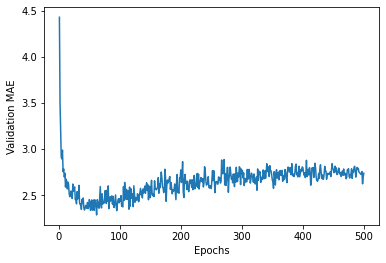

In [ ]:
## Make a plot
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

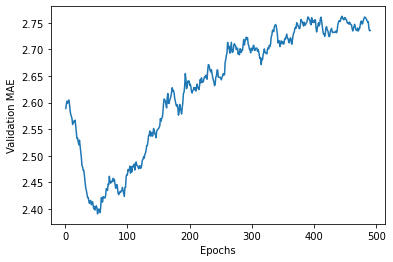

In [ ]:
## Further refine the plot
## Omit the first 10 data points, which are on a different scale from the rest of the curve.
## Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
## According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. 
## Past that point, we start overfitting.
## So we can choose the optimal epoch number is 80.
## Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers)
## we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data.
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 3ms/step - loss: 17.8725 - mae: 2.6021


2.602057933807373